#### Importing Necessary Libraries

In [1]:
import matplotlib.image as mpImg 
import matplotlib.pyplot as plt
import os
import numpy as np

from sklearn.model_selection import train_test_split as trainTestSplit
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from tabulate import tabulate

#### Defining Constants

In [2]:
ManU = 0
Chelsea = 1

#### Reading the Image

In [3]:
def loadImgFromFolder(folderPath):
    images = []
    imagesName = []
    
    for fileName in os.listdir(folderPath):
        img = mpImg.imread(os.path.join(folderPath, fileName))
        if img is not None:
            images.append(img)
            imagesName.append(fileName.replace('.jpg', ''))
            
    return images, imagesName

#### Averaging RGB

In [4]:
def calcAvgRGB(images):
    numImages = len(images)
    avgRGB = np.zeros([numImages,3])
    
    for i in range(0,numImages):
        avgRGB[i,:] = np.average(np.average(images[i], axis=0), axis=0)
        
    return avgRGB

#### Finding Labels

In [5]:
def findLabels(imageNames):
    numImageNames = len(imageNames)
    labels = np.zeros(numImageNames)
    
    for i in range(0, numImageNames):
        if imageNames[i][0] == 'c' or imagesNames[i] == 'index':
            labels[i] = Chelsea 
    return labels

#### َGaussian Naive Bayes Classifier

In [6]:
def predWithGNBC(trainData, trainLabel, testData):
    myClsf = GaussianNB()
    myClsf.fit(trainData, trainLabel.ravel())
    return myClsf.predict(testData), myClsf

#### KNN Classifier 

In [7]:
def predWithKNN(k, trainData, trainLabel, testData):
    myClsf = KNeighborsClassifier(k) 
    myClsf.fit(trainData, trainLabel.ravel())
    return myClsf.predict(testData), myClsf

#### Plot Confusion Matrix 

In [15]:
def plotConfsMat(estimator, testData, testLabel):
    metrics.plot_confusion_matrix(estimator, testData, testLabel, 
                                  display_labels=['ManU','Chelsea'], cmap=plt.cm.Purples)
    plt.title('Confusion Matrix')
    plt.show()

#### Confidence Matrix

In [14]:
def plotConfMat(estimator, testData, testLabel):
    metrics.plot_confusion_matrix(estimator, testData, testLabel, normalize='pred', 
                                  display_labels=['ManU','Chelsea'], cmap=plt.cm.Purples)
    plt.title('Confidence Matrix')
    plt.show() 

#### Plot Table Beautifully

In [10]:
def plotTable(clmData1, clmData2, clmData3, clmDataHeadears):
    data = []
    for i in range(len(clmData1)):
        data.append([clmData1[i], '{:1.2f}'.format(clmData2[i]), 
                     '{:1.2f}'.format(clmData3[i])])
        
    print(tabulate(data, headers=clmDataHeadears, tablefmt="fancy_grid", 
                   colalign=("center",)))

#### Calculate and Show Correct Classification Rate

In [11]:
def calcShowCCR(trueLabel, predLabel):
    matrix = metrics.confusion_matrix(trueLabel, predLabel)
    num = sum(matrix[i][i] for i in range(len(matrix)))
    denum = matrix.sum()
    CRR =num/denum
    print("* Correct classification rate after employing this classifier is: %1.3f"%(CRR))

#### Calculate and Show Accuracy, Recall, and Percision

In [12]:
def calcAccRcllPer(trueLabel, predLabel):
    accuracy = metrics.accuracy_score(trueLabel, predLabel)
    print('* Accuracy score after employing this classifier is: %1.3f' %(accuracy))
    print('\n')
        
    recallManU = metrics.recall_score(trueLabel, predLabel, pos_label=0)
    recallChelsea = metrics.recall_score(trueLabel, predLabel, pos_label=1)
    
    percisionManU = metrics.precision_score(trueLabel, predLabel, pos_label=0)
    percisionChelsea = metrics.precision_score(trueLabel, predLabel, pos_label=1)
    
    plotTable(["Man United", "Chelsea"], [recallManU, recallChelsea], 
                  [percisionManU, percisionChelsea], 
                  ['Club Names', "Recall", "Percision"])

#### Employing Above Functions

Gaussian Naive Bayes Classifier Results:


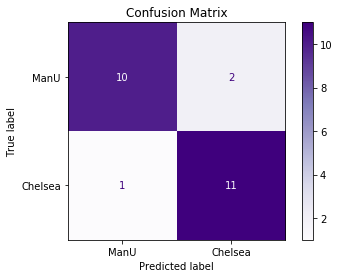

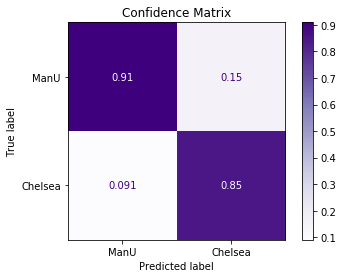

* Correct classification rate after employing this classifier is: 0.875
* Accuracy score after employing this classifier is: 0.875


╒══════════════╤══════════╤═════════════╕
│  Club Names  │   Recall │   Percision │
╞══════════════╪══════════╪═════════════╡
│  Man United  │     0.83 │        0.91 │
├──────────────┼──────────┼─────────────┤
│   Chelsea    │     0.92 │        0.85 │
╘══════════════╧══════════╧═════════════╛
***********************************************************************
5 Near Neighbor Classifier Results:


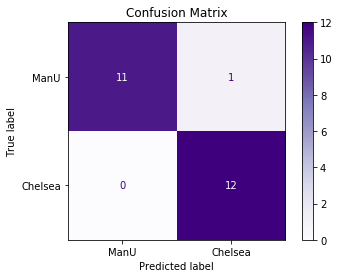

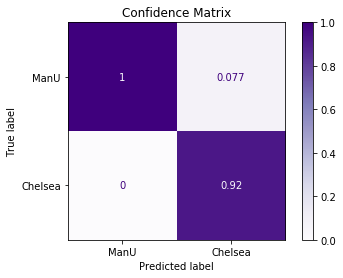

* Correct classification rate after employing this classifier is: 0.958
* Accuracy score after employing this classifier is: 0.958


╒══════════════╤══════════╤═════════════╕
│  Club Names  │   Recall │   Percision │
╞══════════════╪══════════╪═════════════╡
│  Man United  │     0.92 │        1    │
├──────────────┼──────────┼─────────────┤
│   Chelsea    │     1    │        0.92 │
╘══════════════╧══════════╧═════════════╛
***********************************************************************
50 Near Neighbor Classifier Results:


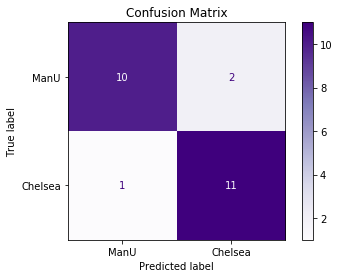

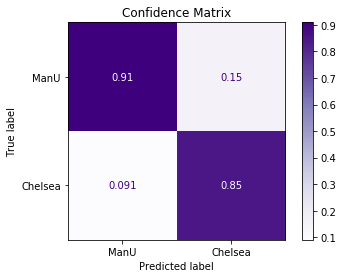

* Correct classification rate after employing this classifier is: 0.875
* Accuracy score after employing this classifier is: 0.875


╒══════════════╤══════════╤═════════════╕
│  Club Names  │   Recall │   Percision │
╞══════════════╪══════════╪═════════════╡
│  Man United  │     0.83 │        0.91 │
├──────────────┼──────────┼─────────────┤
│   Chelsea    │     0.92 │        0.85 │
╘══════════════╧══════════╧═════════════╛


In [16]:
folderPath = "/home/atena/Desktop/Pattern Recognition/HW/1/Q6_Dataset"
#Loading Images:
images, imagesNames = loadImgFromFolder(folderPath)
#Finding the Average RGB:
avgRGB = calcAvgRGB(images)
#Finding MacU and Chelsea Labels:
labels = findLabels(imagesNames)
#Separating Training and Test Datasets:
trainData, testData, trainLabel, testLabel = trainTestSplit(avgRGB, labels, 
                                                            test_size=int(len(labels)* 0.2), 
                                                            random_state=10)

#Using Gaussian Naive Bayes Classifier:
predGNBC, myClsfGNBC = predWithGNBC(trainData, trainLabel, testData)
#Using 5 Near Neighbor Classifier:
pred5NN, myClsf5NN = predWithKNN(5, trainData, trainLabel, testData)
#Using 50 Near Neighbor Classifier:
pred50NN, myClsf50NN = predWithKNN(50, trainData, trainLabel, testData)

#Results:
## Gaussian Naive Bayes Classifier:
print('Gaussian Naive Bayes Classifier Results:')
plotConfsMat(myClsfGNBC, testData, testLabel)
plotConfMat(myClsfGNBC, testData, testLabel)
calcShowCCR(testLabel, predGNBC)
calcAccRcllPer(testLabel, predGNBC)

## 5 Near Neighbor Classifier:
print('***********************************************************************')
print('5 Near Neighbor Classifier Results:')
plotConfsMat(myClsf5NN, testData, testLabel)
plotConfMat(myClsf5NN, testData, testLabel)
calcShowCCR(testLabel,pred5NN)
calcAccRcllPer(testLabel, pred5NN)

## 50 Near Neighbor Classifier:
print('***********************************************************************')
print('50 Near Neighbor Classifier Results:')
plotConfsMat(myClsf50NN, testData, testLabel)
plotConfMat(myClsf50NN, testData, testLabel)
calcShowCCR(testLabel, pred50NN)
calcAccRcllPer(testLabel, pred50NN)
